#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 

It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df1= sns.load_dataset("titanic")

In [5]:
columns= ["age","survived","fare"]

In [6]:
df= df1[columns]

In [7]:
df.head()

,age,survived,fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [8]:
df.isnull().sum()

age         177
survived      0
fare          0
dtype: int64

In [9]:
df.isnull().mean()

age         0.198653
survived    0.000000
fare        0.000000
dtype: float64

In [13]:
df["age"].isnull().sum()

177

In [18]:
df["age"].dropna().sample(df["age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [19]:
def impute_nan (df,variable ,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]

    random_sample = df[variable].dropna().sample(df["age"].isnull().sum(),random_state=0)

    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

     

In [20]:
median = df["age"].median()

In [21]:
median

28.0

In [22]:
impute_nan(df,'age',median)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\775029534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_median"] = df[variable].fillna(median)
C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\775029534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_random"] = df[variable]


In [23]:
df.head()

,age,survived,fare,age_median,age_random
0,22.0,0,7.2500,22.0,22.0
1,38.0,1,71.2833,38.0,38.0
2,26.0,1,7.9250,26.0,26.0
3,35.0,1,53.1000,35.0,35.0
4,35.0,0,8.0500,35.0,35.0


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

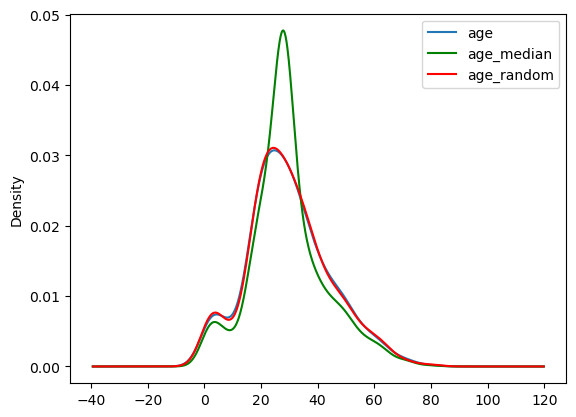

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='green')
df.age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages

1.Easy To implement
2.There is less distortion in variance

### Disadvantage

Every situation randomness wont work

#### ----------Capturing NAN values with a new feature---------

It works well if the data are not missing completely at random

In [29]:
df1= sns.load_dataset("titanic")
columns= ["age","survived","fare"]
df= df1[columns]

In [30]:
df.head()

,age,survived,fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


In [31]:
df["age_nan"] = np.where(df["age"].isnull(),1,0)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\2006314038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age_nan"] = np.where(df["age"].isnull(),1,0)


In [34]:
df.head(15)

,age,survived,fare,age_nan
0,22.0,0,7.2500,0
1,38.0,1,71.2833,0
2,26.0,1,7.9250,0
3,35.0,1,53.1000,0
4,35.0,0,8.0500,0
5,NaN,0,8.4583,1
6,54.0,0,51.8625,0
7,2.0,0,21.0750,0
8,27.0,1,11.1333,0
9,14.0,1,30.0708,0


In [35]:
df.tail()

,age,survived,fare,age_nan
886,27.0,0,13.00,0
887,19.0,1,30.00,0
888,NaN,0,23.45,1
889,26.0,1,30.00,0
890,32.0,0,7.75,0


In [36]:
df["age"].fillna(df.age.median(),inplace=True)

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\2106295557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"].fillna(df.age.median(),inplace=True)


In [37]:
df.head(12)

,age,survived,fare,age_nan
0,22.0,0,7.2500,0
1,38.0,1,71.2833,0
2,26.0,1,7.9250,0
3,35.0,1,53.1000,0
4,35.0,0,8.0500,0
5,28.0,0,8.4583,1
6,54.0,0,51.8625,0
7,2.0,0,21.0750,0
8,27.0,1,11.1333,0
9,14.0,1,30.0708,0


Advantages

1.Easy to implement
2.Captures the importance of missing values

Disadvantages

Creating Additional Features(Curse of Dimensionality)

#### -------End of Distribution Imputation

In [52]:
df1= sns.load_dataset("titanic")
columns= ["age","survived","fare"]
df= df1[columns]

In [53]:
df.head()

,age,survived,fare
0,22.0,0,7.2500
1,38.0,1,71.2833
2,26.0,1,7.9250
3,35.0,1,53.1000
4,35.0,0,8.0500


<Axes: >

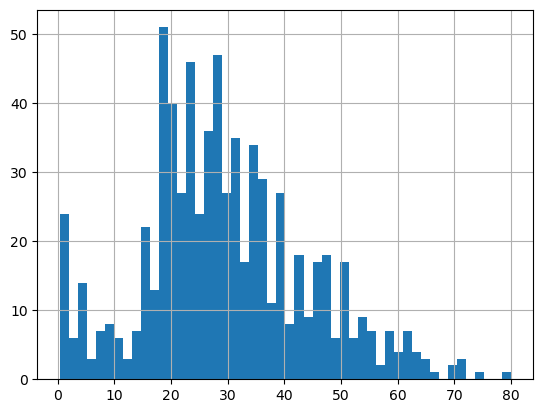

In [54]:
df["age"].hist(bins=50)

In [55]:
extreme= df.age.mean()+3*df.age.std() #-----taking the end vakues from above distribution .Using 3 bcoz it lies after third standard deviation

<Axes: xlabel='age'>

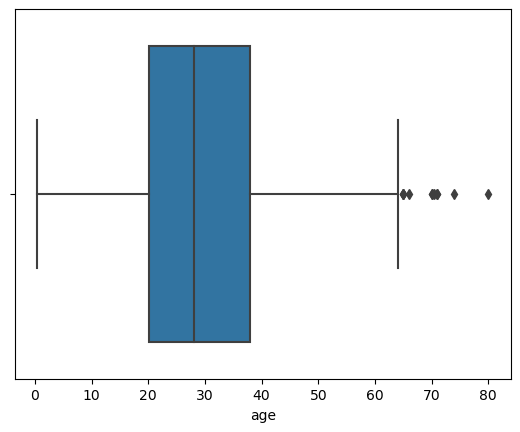

In [56]:
sns.boxplot(x='age',data=df)

In [57]:
def impute_nan(df,variable,extreme,median):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace= True)

In [58]:
impute_nan(df,'age',extreme,df['age'].median())

C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\4241975929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+"_end_distribution"]=df[variable].fillna(extreme)
C:\Users\Shraddha\AppData\Local\Temp\ipykernel_20964\4241975929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable].fillna(median,inplace= True)


In [59]:
df.head()

,age,survived,fare,age_end_distribution
0,22.0,0,7.2500,22.0
1,38.0,1,71.2833,38.0
2,26.0,1,7.9250,26.0
3,35.0,1,53.1000,35.0
4,35.0,0,8.0500,35.0


<Axes: >

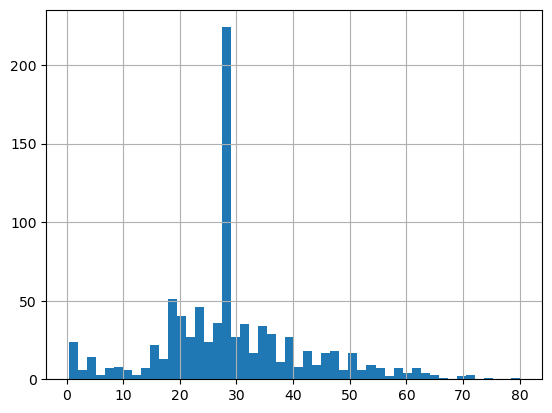

In [60]:
df['age'].hist(bins=50)

<Axes: >

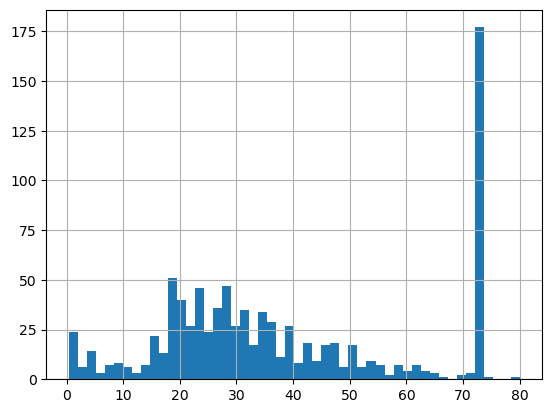

In [61]:
df['age_end_distribution'].hist(bins=50)

<Axes: xlabel='age_end_distribution'>

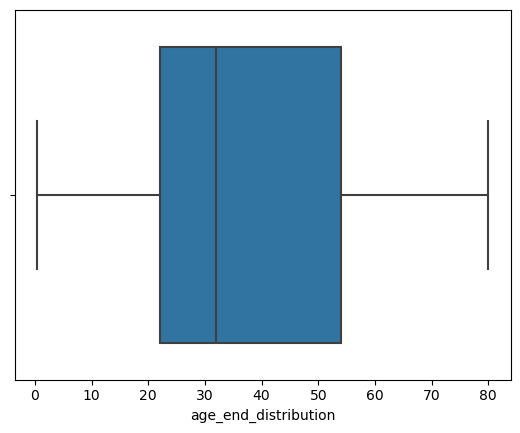

In [62]:
sns.boxplot(data=df,x="age_end_distribution")